In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import plotnine as p9
from plotnine import *

from scipy.stats import gaussian_kde

df = pd.read_csv('/home/luca/Dropbox/Data Science (Coventry)/emission data.csv')

In [3]:
pd.set_option("display.max_rows", 200)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [4]:
#df.iloc[0:10, 247:280]

In [5]:
emission_df = df.loc[0:232] 

emission_df

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,...,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9581072,10522304,12192701,14086633,15617799,17255042,19170720,21295245,23279471,25666216,27821636,30056540,31813562,33792934,35888474,38408565,41230980,44732874,47866946,50981106,53838190,56603078,59205485,61631971,63013493,64347330,65629819,66860958,68026093,69110567,70140029,70949598,71717793,72529867,73593942,74781013,75722468,77042718,78685964,80954308,85152637,91912951,100365175,112591192,123333249,133333663,143122849,153230277,165488185,178502925
1,Africa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4666578852,4944494661,5247118415,5578986587,5930864378,6308876953,6697285297,7084592465,7504779055,7937798099,8400306507,8899345945,9435008665,9983549771,10555231206,11149714412,11798923169,12464569744,13154157563,13843743194,14568340496,15266086644,15923936796,16610791075,17280348214,17989891459,18710122956,19485633617,20279206383,21091886368,21927216344,22755551690,23640083267,24519201998,25403353837,26365325805,27398417645,28442492860,29526291008,30652623962,31830766884,33019042498,34212826270,35411199285,36645041459,37895685023,39186174236,40475177493,41785833882,43117573841
2,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36141696,39384336,43125280,47474448,53113344,58400496,62742336,67333328,72279728,77995568,84484512,92065328,97231568,104566896,111869248,119494032,127313008,135186944,143236752,150674672,157995344,166972144,172482800,176766016,179279520,181613488,183537088,185621904,187637104,189179648,190931040,193913536,196932672,200153328,203901600,208192144,212354448,216604688,220499520,224423664,228794816,233169632,237764288,243000144,247906240,252966224,258678400,264626124,270898982,277278189
3,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,114710602,125973568,141032528,159682059,188004699,226282100,258158760,290159967,329291037,371135950,433591216,479136768,545553235,591895222,631068251,683572166,754518696,827127764,903208153,987091655,1070799688,1150607954,1227344595,1306149946,1386031717,1467974158,1554120833,1649102794,1745888914,1832893260,1939514090,2031182001,2118624684,2202405358,2291812079,2382860272,2470713375,2577186565,2677387726,2785787700,2894819537,3015005401,3132819477,3252626365,3380736316,3513170946,3656347996,3806940494,3957318519,4107869896
4,Americas (other),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3664,7328,10992,14656,18320,21984,25648,29312,32976,36640,40304,43968,47632,51296,54960,...,17938791516,18716543170,19577194050,20474239932,21425741192,22430167407,23476655535,24538461404,25644500721,26780676071,27977569203,29255379311,30575202005,31872421745,33178160301,34436668651,35726453419,37039541856,38354714082,39741104420,41175124958,42676170902,44139315940,45610299952,47114212624,48656871827,50253627689,51873213217,53561428365,55328368455,57177221097,59067565309,60974588046,62905083846,64857939638,66861915212,68873832710,70950783125,73065649503,75233665397,77460245651,79617865087,81871783973,84166563311,86541969037,88948744132,91391915488,93827469251,96242527324,98641159642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [6]:
world_emission_df = df.iloc[227]

world_emission_df = pd.DataFrame(world_emission_df)

world_emission_df

world_emission_df = world_emission_df.drop(['Country'])

In [7]:
world_emission_df['Year'] = world_emission_df.index

world_emission_df = world_emission_df.reset_index()

world_emission_df.columns = ['Index', 'Emission', 'Year']

world_emission_df = world_emission_df.drop('Index', axis=1)

world_emission_df = world_emission_df.reindex(columns = ['Year', 'Emission'])

world_emission_df

,Year,Emission
0,1751,9350528
1,1752,18704720
2,1753,28058912
3,1754,37416768
4,1755,46778288
...,...,...
262,2013,1430000000000
263,2014,1470000000000
264,2015,1500000000000
265,2016,1540000000000


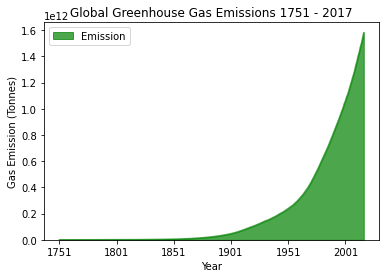

In [8]:
world_emission_chart = world_emission_df.plot('Year', 'Emission', kind='area', color='green', alpha=0.7, 
title='Global Greenhouse Gas Emissions 1751 - 2017', ylabel='Gas Emission (Tonnes)')

In [9]:
x = world_emission_df['Year'].to_numpy()
y = world_emission_df['Emission'].to_numpy()


#Taken from Stack Overflow, pyplot expects float inputs from NumPy array
x = np.array(x, dtype = float)
y = np.array(y, dtype = float)

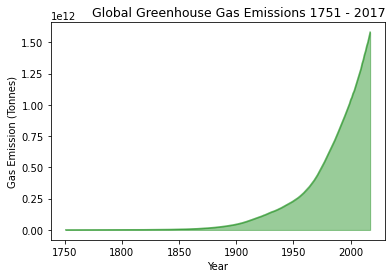

In [10]:
plt.fill_between(x, y, color = 'green', alpha = 0.4)
plt.plot(x, y, color = 'green', alpha = 0.6)
plt.style.use('fivethirtyeight')

plt.xlabel('Year')
plt.ylabel('Gas Emission (Tonnes)')
plt.title('Global Greenhouse Gas Emissions 1751 - 2017', loc = 'right', fontsize=12.5)

#plt.legend(loc = "upper left") #output: "No handles with labels found to put in legend."

plt.show()

In [11]:
df = emission_df.loc[emission_df['Country'].isin(['Asia and Pacific (other)', 'Canada', 'China', 'EU-28', 'Japan', 'Russia', 'United Kingdom', 'United States'])]

In [12]:
column_list = df.columns.tolist() #change this
column_list = column_list[1:247]

df = df.loc[:, ~df.columns.isin(column_list)]

#df.info

In [13]:
#df['Country'] = df.index #DEFINE THE INDEX FIRST THEN MELT DF

df = pd.melt(df, id_vars='Country', var_name='Year', value_name='Emission')

df = df.sort_values('Year').reset_index(drop=True)

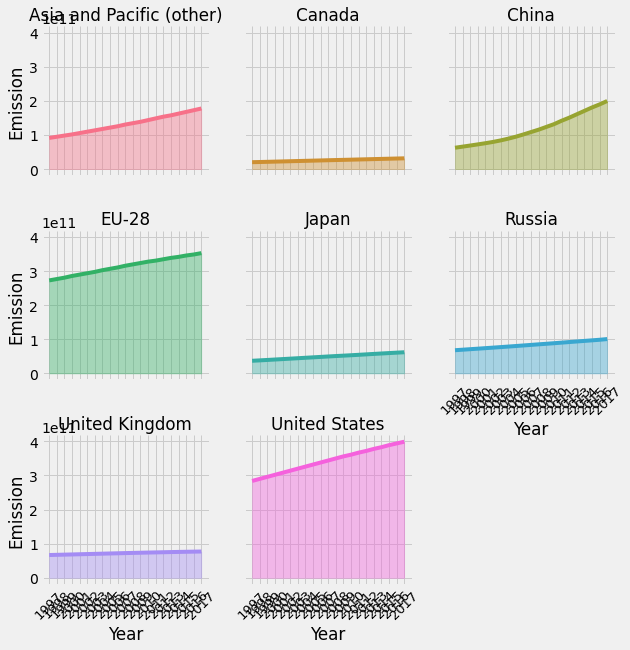

In [14]:
       
graph = sns.FacetGrid(df, col='Country', hue='Country', col_wrap=3)

graph = graph.map(plt.plot, 'Year', 'Emission')

graph = graph.map(plt.fill_between, 'Year', 'Emission', alpha=0.4)

graph = graph.set_titles("{col_name}")

graph = graph.set_xticklabels(size = 13, rotation = 45)

In [15]:
china_df = df.loc[df['Country'] == 'China']
us_df = df.loc[df['Country'] == 'United States']
eu_df = df.loc[df['Country'] == 'EU-28']
uk_df = df.loc[df['Country'] ==  'United Kingdom']

density_df = [china_df, us_df, eu_df, uk_df]
density_df = pd.concat(density_df)

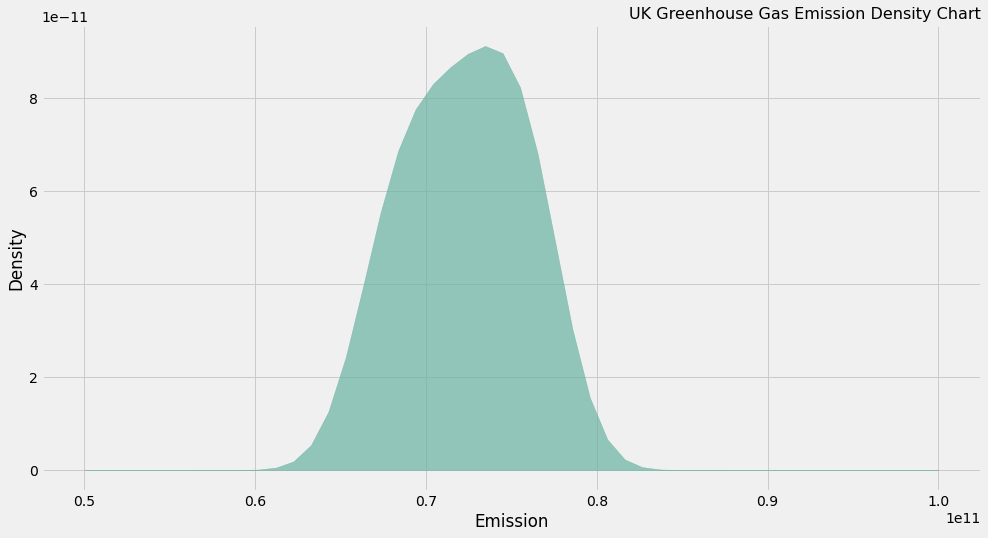

In [16]:
density = gaussian_kde(uk_df.Emission)
density.covariance_factor = lambda : .65
density._compute_covariance()

vec = np.linspace(50000000000, 100000000000)

plt.figure(figsize=(15, 8))
plt.fill_between(vec, density(vec), color="#69b3a2", alpha=0.7)
plt.xlabel('Emission')
plt.ylabel('Density')
plt.title('UK Greenhouse Gas Emission Density Chart', loc = 'right', fontsize=16)

plt.show()

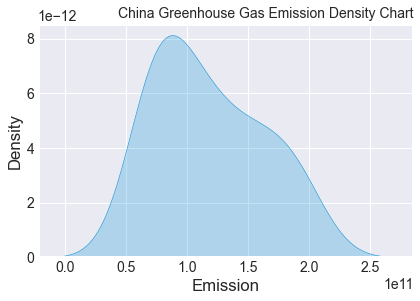

In [17]:
sns.set_style('darkgrid')
sns.kdeplot(china_df['Emission'], shade=True)
plt.title('China Greenhouse Gas Emission Density Chart', loc = 'right', fontsize=14)

plt.show()

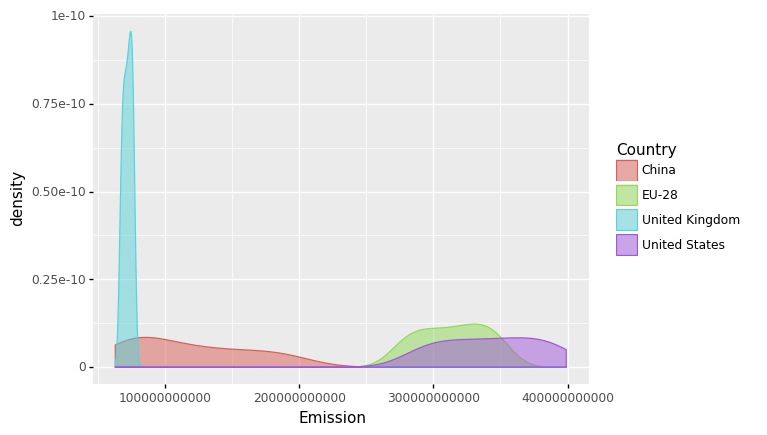

<ggplot: (8741611563454)>

In [18]:
#FIX LABEL TICKS, ADD TITLE

(
    ggplot(density_df, aes(x='Emission', color='Country', fill='Country'))
    + geom_density(aes(), alpha = 0.5)
)



<AxesSubplot:ylabel='Frequency'>

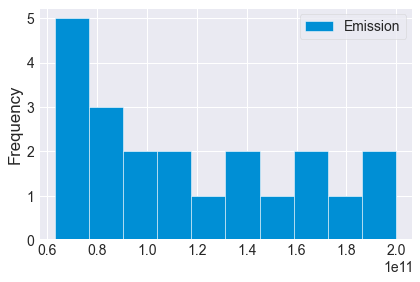

In [19]:
china_df.plot.hist()

/home/luca/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Emission'>

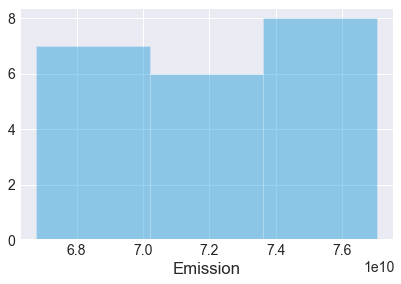

In [20]:
sns.distplot(uk_df['Emission'], hist=True, kde=False, rug=False)

/home/luca/miniconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 3'. Pick better value with 'binwidth'.


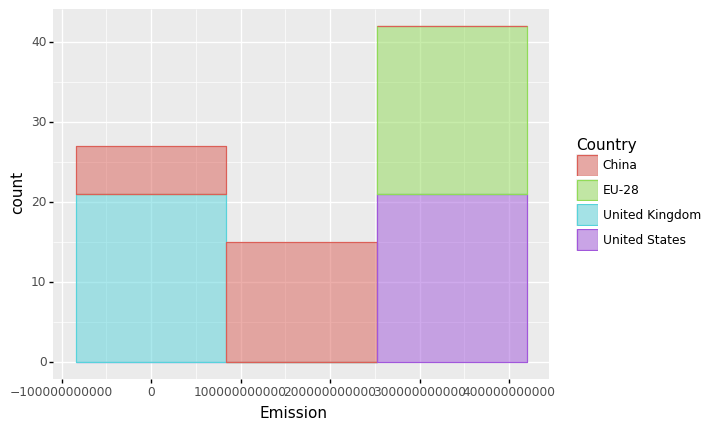

<ggplot: (8741609809149)>

In [21]:
(
    ggplot(density_df, aes(x='Emission', color='Country', fill='Country'))
    + geom_histogram(aes(), alpha = 0.5)
)